In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.duplicated().sum()

0

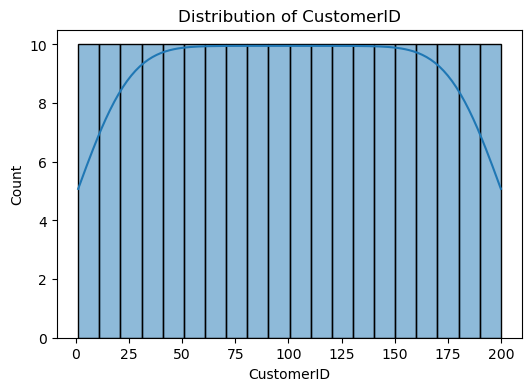

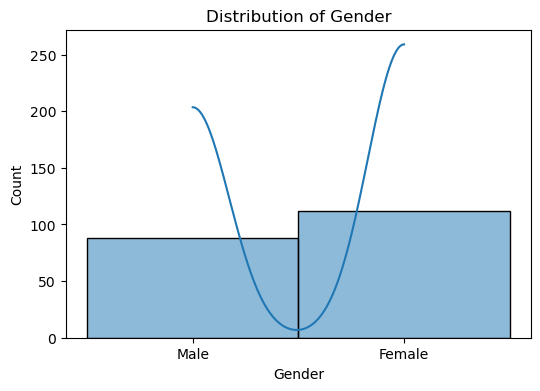

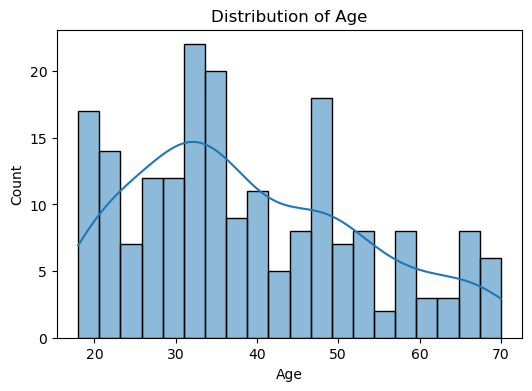

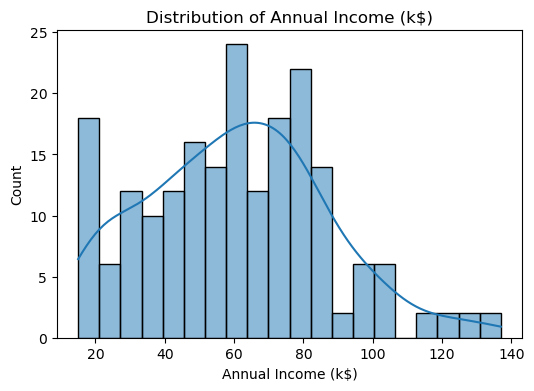

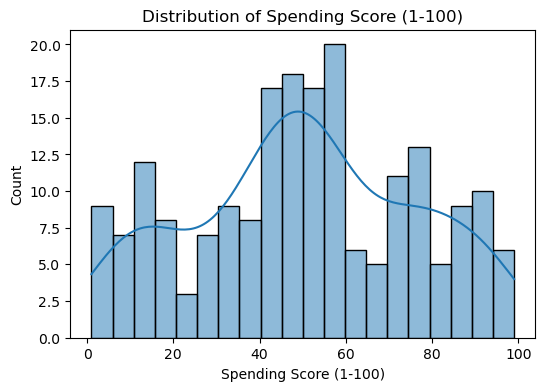

In [17]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

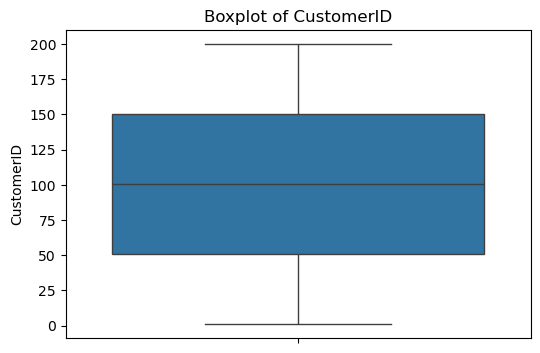

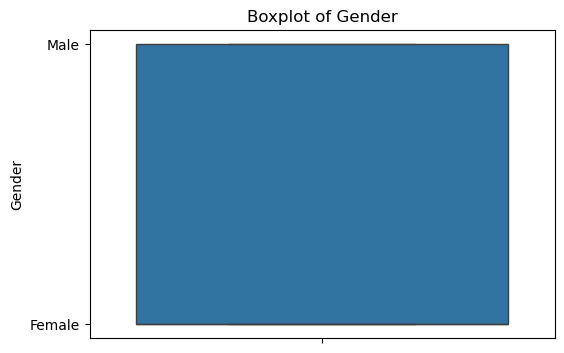

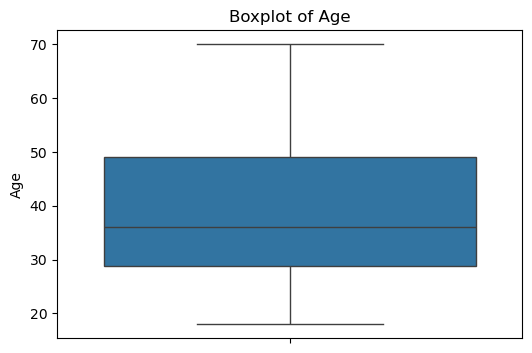

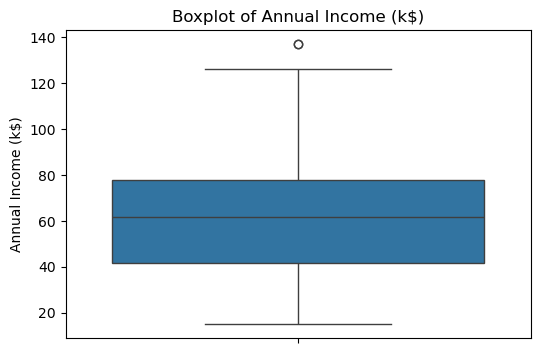

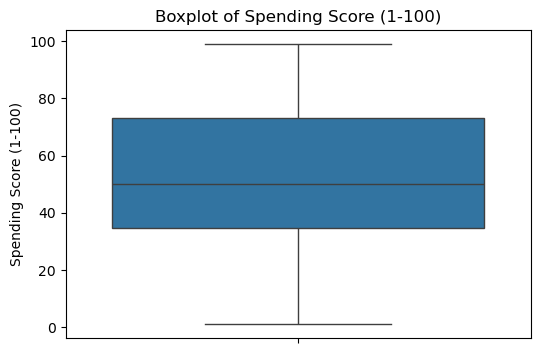

In [20]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

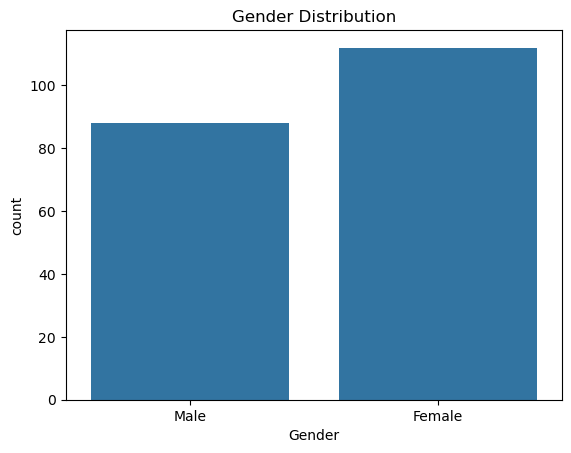

In [24]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler as Sc

scaler = Sc()
df_scaled = df.copy()
df_scaled[['Age','Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061
196,197,Female,0.441365,2.497807,-0.861839
197,198,Male,-0.491602,2.497807,0.923953
198,199,Male,-0.491602,2.917671,-1.250054


C:\Users\mgod8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mgod8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mgod8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mgod8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

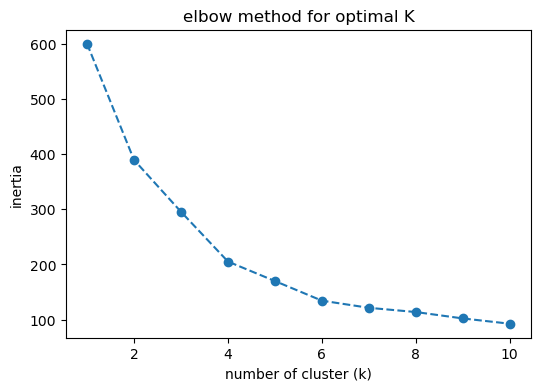

In [34]:
from sklearn.cluster import KMeans
import numpy as np

inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled[['Age','Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker ="o", linestyle="--")
plt.xlabel('number of cluster (k)')
plt.ylabel('inertia')
plt.title('elbow method for optimal K')
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\mgod8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


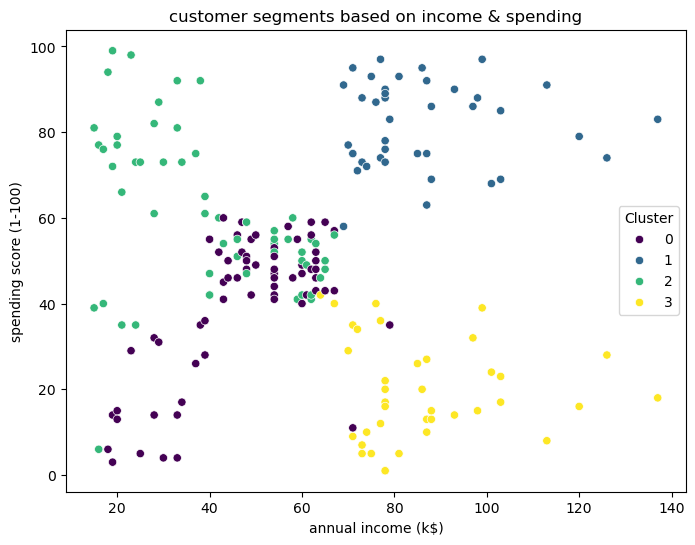

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df_scaled['Cluster'], palette='viridis')
plt.title('customer segments based on income & spending')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.show()

In [58]:
age_analysis = df.groupby('Cluster')['Age'].mean().reset_index()
print(age_analysis)

   Cluster        Age
0        0  44.894737
1        1  32.692308
2        2  24.821429
3        3  40.394737


In [52]:
gender_analysis = df.groupby('Cluster')['Gender'].value_counts().unstack()
print(gender_analysis)

Gender   Female  Male
Cluster              
0            59    36
1            21    18
2            14    14
3            18    20


In [54]:
income_spending = df.groupby('Cluster')[["Annual Income (k$)", 'Spending Score (1-100)']].mean()
print(income_spending)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.705263               42.631579
1                 86.538462               82.128205
2                 28.714286               74.250000
3                 87.000000               18.631579


In [60]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3
